# 1-Qubit Gates: Decompositions and Noise

## Objectives:
* Learn how noise effects the accuracy of results
* Run on a real machine!

## Noise

Up until now, we have mostly emphasized the theoretical methods for performing quantum computing.  Alas, this is not the entire story.  On real machines, making and manipulating true quantum states are hard.  This is because:

* <b>Decoherence</b>: Qubits are hard to isolate from the enviroment. (Temperature, electrical noise, earthquakes all can effect you)
* <b>Gate Fidelity</b>: Gates are hard to implement exactly (You try and get a bunch of lasers, magnets, and current to flow consistently!)
* <b>Readout Error</b>: Performing measurements on qubits to extract their state at the end isn't always accurate, because measurements in reality can change the state.

The entire experimental effort to make better quantum computers is about tackling these various errors.

In the first part of this lab, we will investigate a <b>noise model</b> to see how these effects limit quantum computation, and how changing decomposition can change the error.

## Unfaithful Gates

One of the simplest noise models is to assume that every quantum gate $U$ isn't performed exactly, and instead it performs $U'=U\epsilon$ where

$\epsilon=\begin{pmatrix}\sqrt{1-e^2} & e \\ -e & \sqrt{1-e^2}\\\end{pmatrix}$

The way to think about this matrix is as analogous to adding a little bit to the identity matrix $\mathbb{1}+\epsilon$, but in a unitary way.  When $e=0$, this corresponds to $U'=U$ and you have no gate error.  When $e=1$ you have maximally bad quantum gates and you can't use your quantum computer at all.

This might all seem confusing, so lets try some examples.

First, lets import the necessary gates and a state $psi_i$

In [161]:
import numpy as np
import matplotlib.pyplot as plt

#Initial state of the quantum computer, A BELL STATE!
psi_i=1/np.sqrt(2)*np.array([1,1])

#The set of basic gates we will play with
X = np.matrix([[0,1],[1,0]])
Y = np.matrix([[0,-1j],[1j,0]])
Z = np.matrix([[1,0],[0,-1]])
H = 1/np.sqrt(2)*np.matrix([[1,1],[1,-1]])
S = np.matrix([[1,0],[0,1j]])
T = np.matrix([[1,0],[0,np.exp(1j*np.pi/4)]])

#U gate
U = np.matrix([[np.cos(0.1*np.pi/2),-1j*np.sin(0.1*np.pi/2)],[-1j*np.sin(0.1*np.pi/2),np.cos(0.1*np.pi/2)]])


#The epsilon gate, which models noise.  It takes in a parameter, e, which determines how bad the noise is.
def epsilon(e):
    return np.matrix([[np.sqrt(1-e**2),e],[-e,np.sqrt(1-e**2)]])


With these gates, let us try to see how a noiseless gate acting on the Bell state differs from the noisy one.  Do do this, we need to act on our state with the matrices, which can be done with the syntax:

    psi_f_clean = U @ psi_i
    psi_f_noise = U @ epsilon(e) @ psi_i    
    
Where we have defined a value of $e$.  Try $e=0.1$ and use the $U$ gate

In [81]:
##### Set e to some value
e= ?????

#### Compute the noiseless final state psi
psi_f_clean = ?????

#### Compute the noisy final state
psi_f_noise = ?????

#Print the final state probabilities for the qubit being found in state |0> and |1>

print("Probabilities after noiseless gate:",np.power(psi_f_clean,2))

print("Probabilities after noisy gate:",np.power(psi_f_noise,2))


<b>How did the noise affect the measurement?</b>  Presumably you found that the noise took the final state away from its expect value.  This means that your ability to correctly perform quantum algorithms is limited by said noise.  Let's take this one step further.  Instead of just one gate with noise, lets try running 10 $U$ gates to compare. The syntax for this tests is:

    psi_f_clean = np.linalg.matrix_power(U,10) @ psi_i
    psi_f_clean = np.linalg.matrix_power(U @ epsilon(e),10) @ psi_i
 

In [90]:
e=0.1

#### Compute the noiseless final state psi
psi_f_clean = ?????

#### Compute the noisy final state
psi_f_noise = ?????

#Print the final state probabilities for the qubit being found in state |0> and |1>
print("Probabilities after noiseless gate:",np.real(np.diag(np.dot(np.transpose(np.conj(psi_f_clean)),psi_f_clean))))
print("Probabilities after noisy gate:",np.real(np.diag(np.dot(np.transpose(np.conj(psi_f_noise)),psi_f_noise))))

<b>Did you notice how much worse the final state error is when we used 10 gates versus 1?</b> For a sufficiently large number of gates, your results can different so much that it is impossible to recover even approximately the right answers.

In this way, the <b>gate fidelities</b>, and noise in general, fundamentally limit the size of quantum computers and the length of the circuits we can compute.

In the previous example, the noise was the same for all gates.  Another noise model would be to suppose that the error matrix, $epsilon$ has a different value of $\epsilon$ every time.

The code for this random $\epsilon$ is:

In [153]:
def epsilon_r():
    e = 0.25*np.random.ranf()
    return np.matrix([[np.sqrt(1-e**2),e],[-e,np.sqrt(1-e**2)]])

If you remember one of the important identities from this morning was: $HXH=Z$. Let's try modelling the effect of noise on these two different implementation of the $Z$ gate.  Using the same syntax as before, <b>compute the probabilities of getting the right results for each case.</b>

In [159]:
#### The noiseless version of the 3 gate version HXH, of the final state without noise
psi_f_clean = H @ X@ H@ psi_i

#### Compute the 3gate version, HXH, of the final state psi with noise.  For every H or X gate
#### you need to also introduce an epsilon_r() gate
psi_f_3 = H@ epsilon_r() @ X@ epsilon_r() @ H@ epsilon_r() @ psi_i

#### Compute  the 1 gate version, Z, of the final state psi with noise
psi_f_1 = Z @ epsilon_r() @ psi_i


#Print the final state probabilities for the qubit being found in state |0> and |1>
print("Probabilities after noiseless gate:",np.real(np.diag(np.dot(np.transpose(np.conj(psi_f_clean)),psi_f_clean))))
print("Probabilities after noisy 3-gate:",np.real(np.diag(np.dot(np.transpose(np.conj(psi_f_3)),psi_f_3))))
print("Probabilities after noisy 1-gate:",np.real(np.diag(np.dot(np.transpose(np.conj(psi_f_1)),psi_f_1))))

Probabilities after noiseless gate: [0.5 0.5]
Probabilities after noisy 3-gate: [0.47691563 0.52308437]
Probabilities after noisy 1-gate: [0.50778303 0.49221697]


If probably seems difficult for you to tell which one of these implementations is better by just looking at a single run, so how about we <b>simulate a bunch of trials</b> of this, <b>make a histogram of the two implementaions</b>, and compare the widths of the histograms to judge which implementation is better!

In the histogram below, we plot the 3-gate implementation in red and the 1-gate implementiation in blue.

*<b>Which implementation has the smaller error on average?</b>

In [166]:
g3=[]
g1=[]
for i in range(1000):
    ### Copy your noisy version of the 3gate implementation here
    psi_f_3 = ??????
    
    ### Copy your noisy version of the 3gate implementation here
    psi_f_1 = Z @ epsilon_r() @ psi_i
    
    #This will add the probability of |0> state into an array to plot!
    g3.append(np.real(np.diag(np.dot(np.transpose(np.conj(psi_f_3)),psi_f_3)))[0])
    g1.append(np.real(np.diag(np.dot(np.transpose(np.conj(psi_f_1)),psi_f_1)))[0])

plt.hist(g3, 50, density=True, facecolor='r', alpha=0.75)
plt.hist(g1, 50, density=True, facecolor='b', alpha=0.75)

## Running on a Real Machine

Let's put all this knowledge into a bit of practice.  In the previous lab, we discovered that an inefficient version of the $X$ gates was "$𝐻𝑌𝐻𝑍𝑆𝑇𝑆𝐻𝑋𝐻𝑇𝑆𝑋𝑌𝑋𝐻𝑍𝐻$.  Alas, today quantum computers are just good enough that the error in this gate is hard to see compared to $X$.  Therefore we are going to consider the effect of noise a different implementation of $X$, mainly $YXSHHSYS^{\dagger}ZHYS^{\dagger}XSZXZS^{\dagger}ZSXZZYYYZS^{\dagger}S^{\dagger}YHS^{\dagger}S^{\dagger}HXXSS^{\dagger}ZHXYXHS^{\dagger}SS^{\dagger}XSHYSZHXZXYZHS^{\dagger}XS^{\dagger}YHXXZZSS^{\dagger}XYSZS^{\dagger}XS^{\dagger}SYSXHXSS^{\dagger}HHXS^{\dagger}S^{\dagger}YXSHHZYZSX$ (which you can either check or just trust me when I say it is also equivalent to $X$)

From the indico, download the file "Hanks_glorious_gate.qasm".  Open up the IBM Composer and upload this file.  This should lead to a composer set up similar to below, much much longer and with <b>barriers</b> which prevent the transpiler from simplifying this circuit.

In order for this code to run on a real quantum computer, you need to perform a measurement. 

*<b>Add a measurement of the single qubit at the end of the circuit</b>

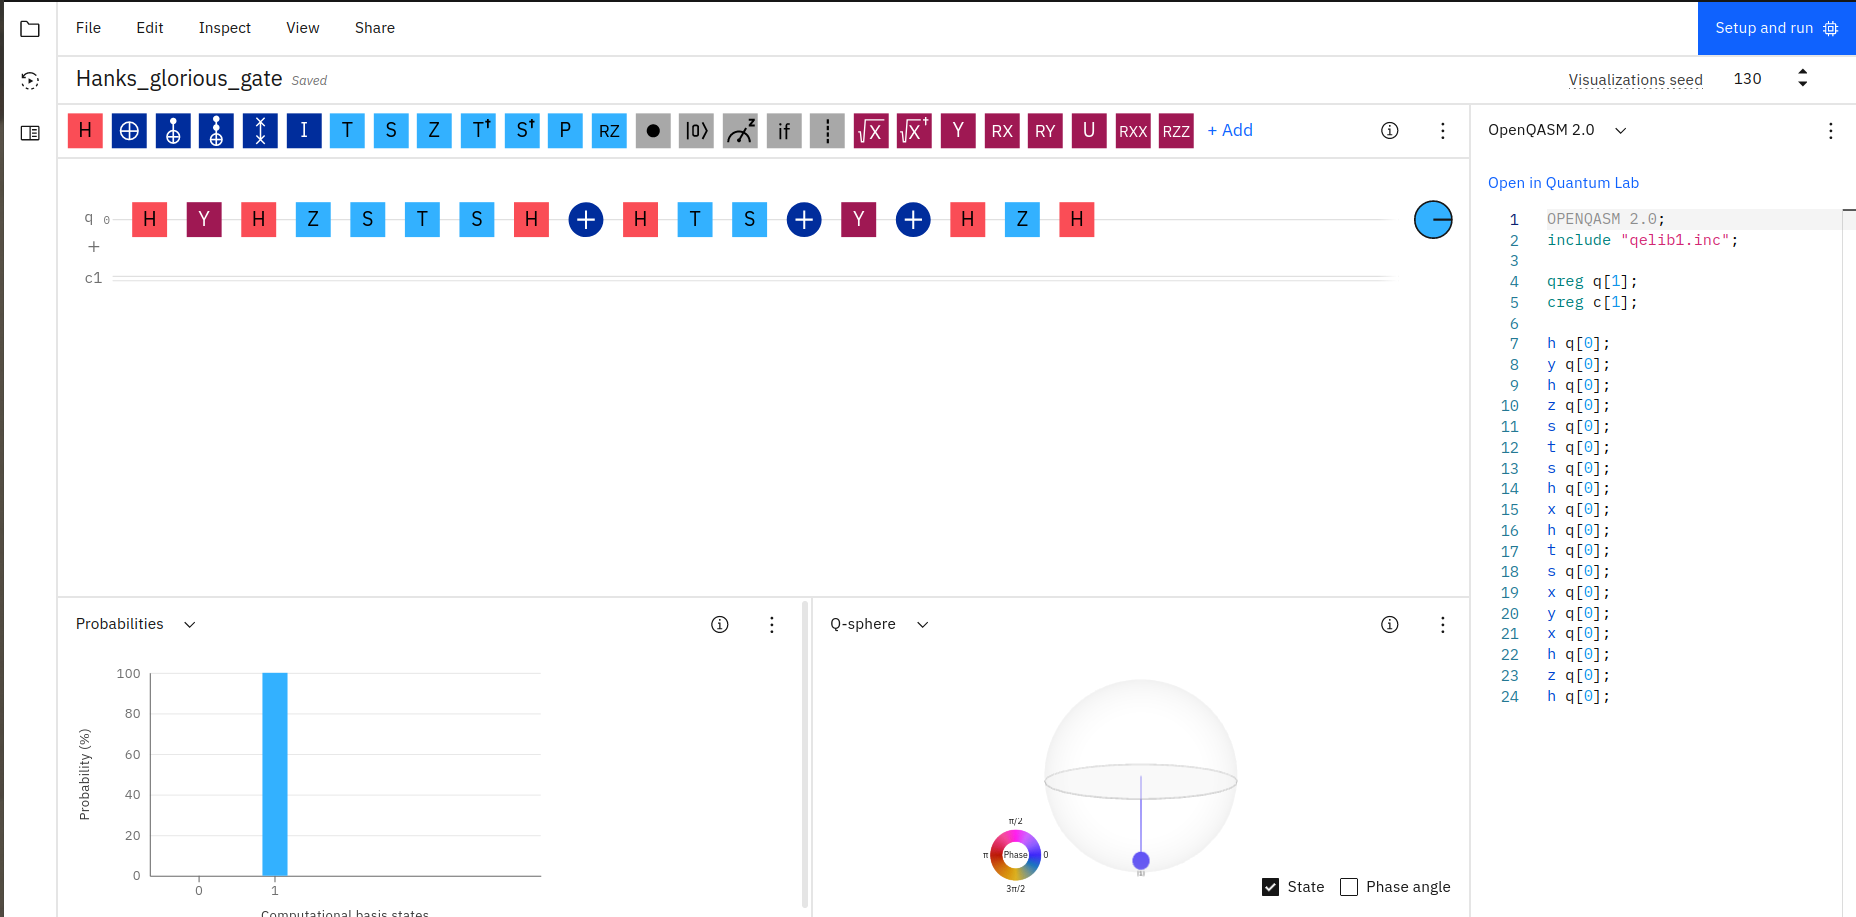

*To proceed, <b>Click the blue button at the top that reads <i>Setup and Run</i></b>.

Upon clicking, a new menu matching below should appear.

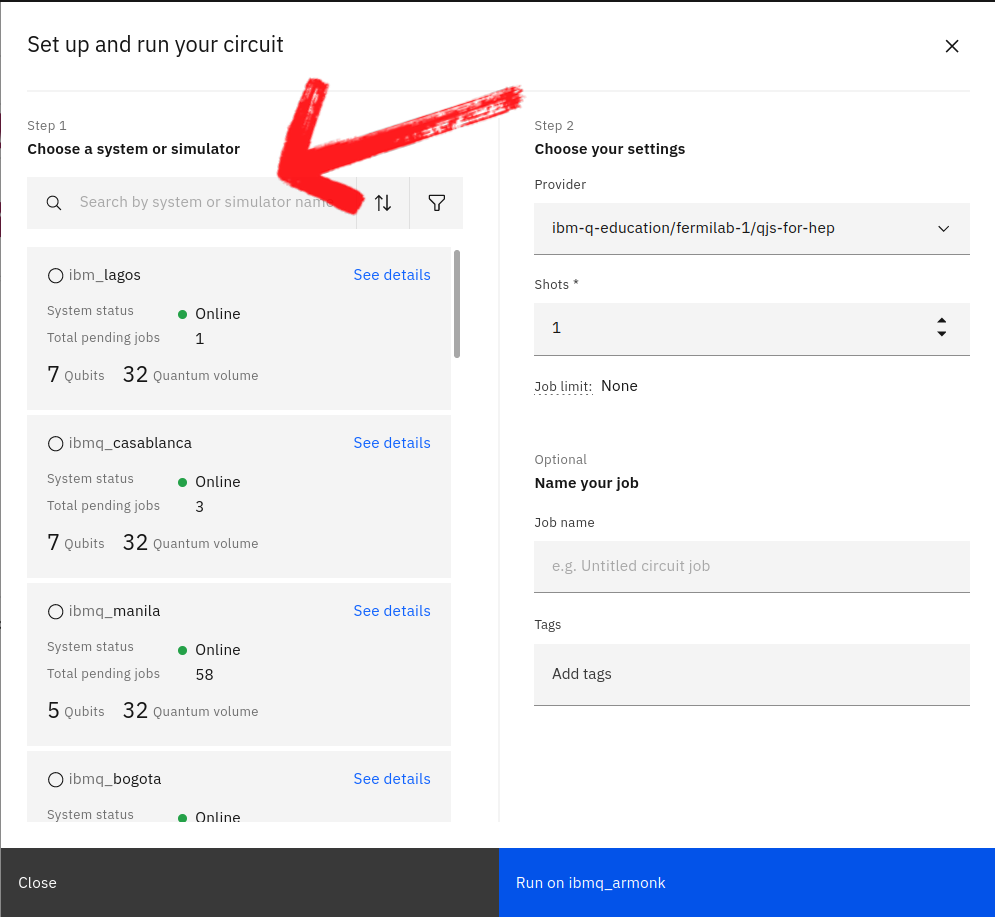

*In the search window, look for <b>lima,belem,</b> or <b>quinto</b>

These are cities in South America.  IBM has a convention of naming their quantum computers based on world cities.

* Make sure your provider is <b>ibm-q-education/fermilab-1/qjs-for-hep</b>
* For the number of shots (how many times to repeat the quantum calculation) put <b>1024</b>
* Give your job a memorable name
* At this point, you can click "Run on ibmq_{name of your computer}"...and you will be performing your first real quantum calculation

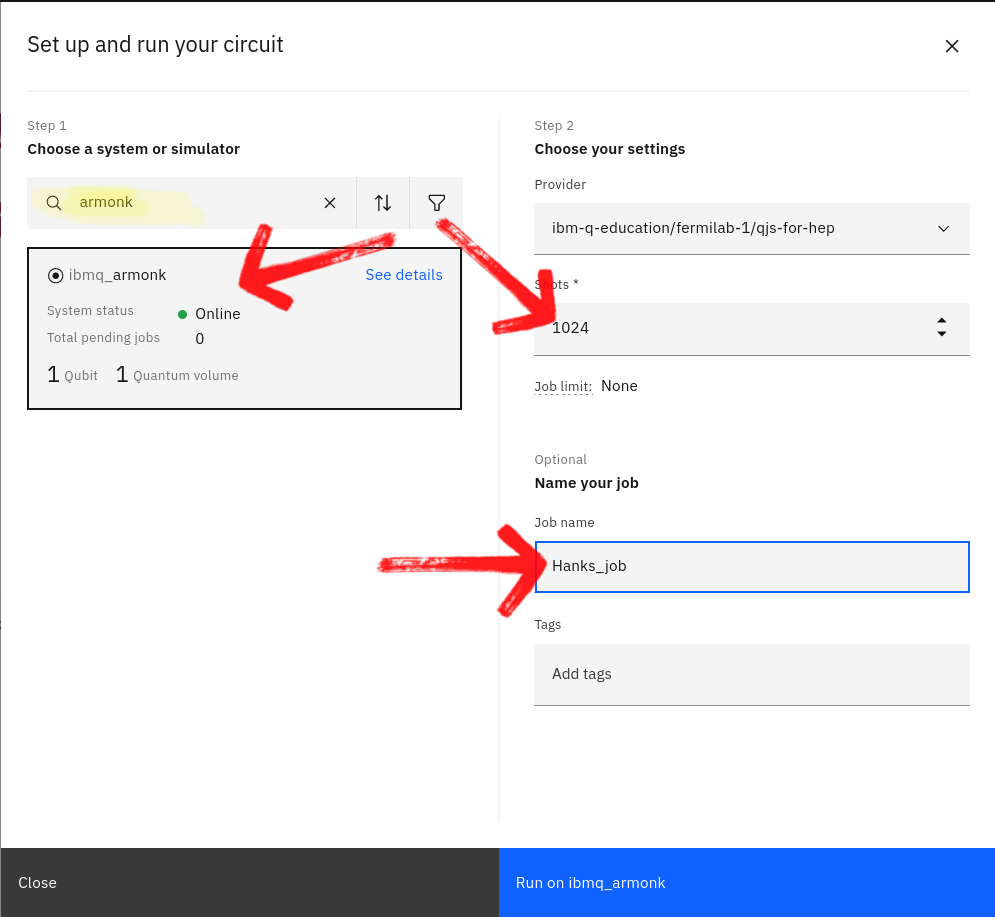

* To monitor your job, <b>Click the icon of a triangle with an arrow circle it to bring up the Composer jobs menus</b>.  It should look like the image below
* Click on the item with the name matching your simulation

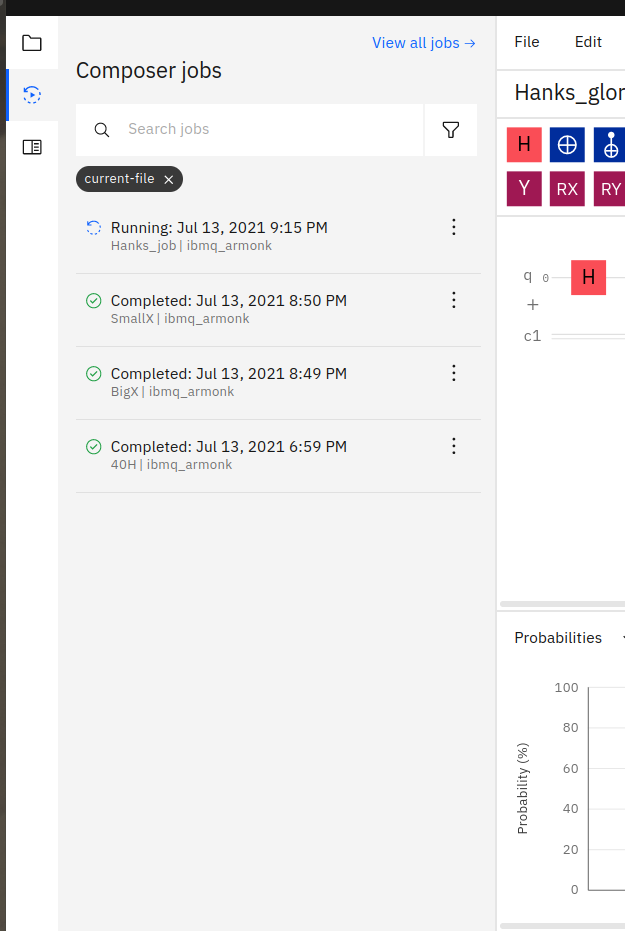

If your job is still running, you will see information like the image below.  After about 30 seconds or so, it should finish and your results should show up.

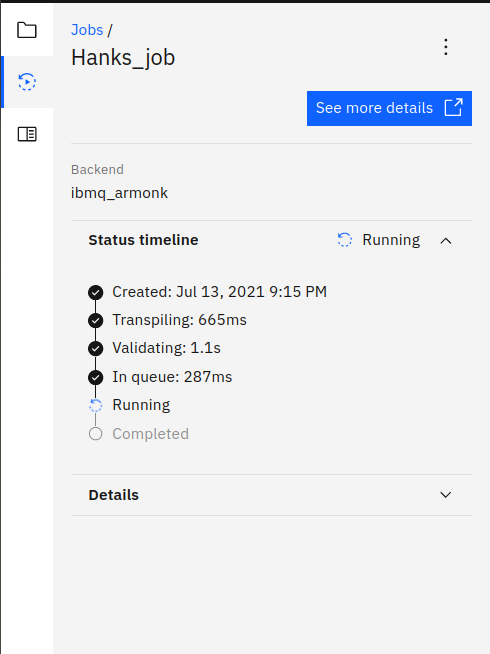

The results will be displayed as a histogram of all the measured results, and the number of times each even occured.

* Hover over the $|1>$ state to see what frequency it occured with. Write down this number.

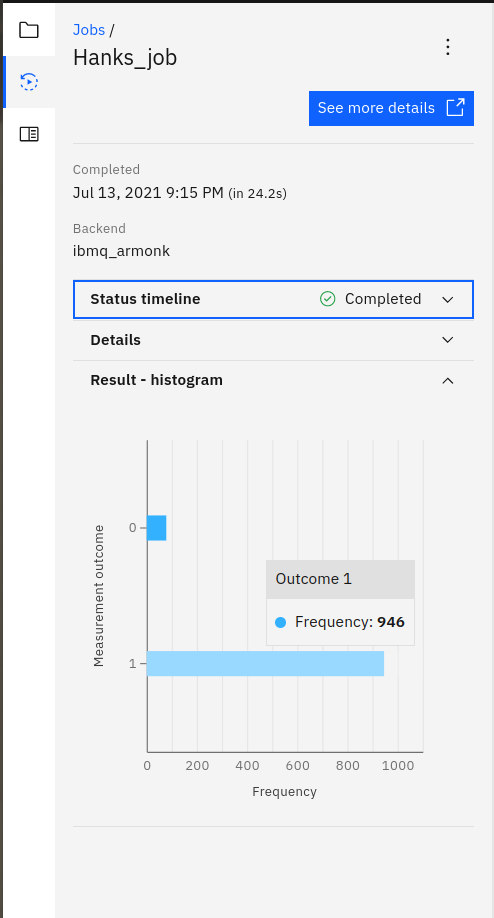

* <b>Dividing this number by the total number of shots (1024)</b>, you will get the measured probability $p_m$ of being found in the X state.

* How does your $p_m$ <b>compare with your theoretical expectation of $p_{theory}=1$</b>?  Is there clearly some type of noise effecting you?

So, to attach an uncertainty to the probability, we appeal to the "Binomial proportion confidence interval" (its got a wiki).  Without worrying too much about the details, insert your frequency into the line below, and extract both the mean probability and its 1$\sigma$ uncertainty.

In [170]:
# Replace this value with your measured frequency
frequency = ???

#probability of getting a |1> state
probability_measured = frequency/1024

#parameters needed for errorbars
z = 1-(1-0.68)/2.0
number_shots=1024

#compute the uncertainty
error_prob = z*np.sqrt(probability_measured*(1-probability_measured)/number_shots)

print("Mean probability: ", probability_measured," 1sigma Uncertainty: ",error_prob)


Presumably, you have established that something is causing error in your results.  Lets see if we can narrow it down.

* In the composer <b>Replace your long circuit by the single $X$</b>
* Run this new code on "armonk", and record your frequency below 
* Does your probability <b>differ greatly from the results from the longer circuit</b>? Does it seem that the gate fidelity is the limiting error?

In [ ]:
# Replace this value with your measured frequency
frequency = ???

#probability of getting a |1> state
probability_measured = frequency/1024

#parameters needed for errorbars
z = 1-(1-0.68)/2.0
number_shots=1024

#compute the uncertainty
error_prob = z*np.sqrt(probability_measured*(1-probability_measured)/number_shots)

print("Mean probability: ", probability_measured," 1sigma Uncertainty: ",error_prob)